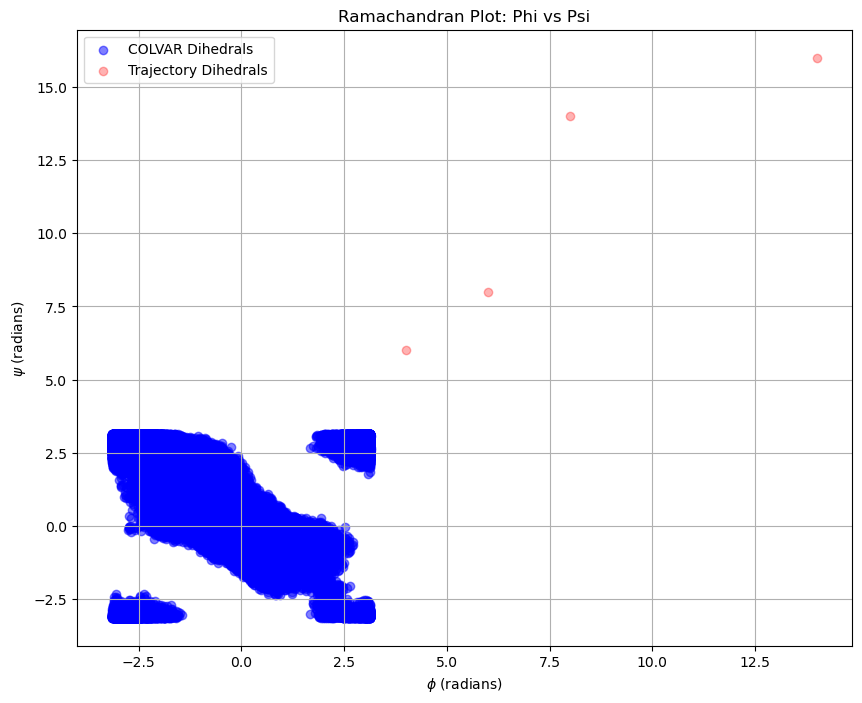

Standard deviation of Phi: 1.629906966651196
Standard deviation of Psi: 1.5400157904368676


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the COLVAR file and extract phi and psi columns
colvar_data = np.loadtxt('/home/yhp2008/comp-lab-class-2024/Week6-Metadynamics/Inputs/DialaB/COLVAR', skiprows=5)  # Update skiprows if header is different
phi_values = colvar_data[:, 1]  # Update column index for phi
psi_values = colvar_data[:, 2]  # Update column index for psi

# Load the trajectory file and topology file using MDTraj
trajectory = md.load('/home/yhp2008/comp-lab-class-2024/Week6-Metadynamics/Inputs/DialaB/traj_comp.xtc', top='/home/yhp2008/comp-lab-class-2024/Week6-Metadynamics/Inputs/DialaB/confout.gro')

# Compute phi and psi dihedrals with MDTraj
phi_indices = md.compute_phi(trajectory)[1]
psi_indices = md.compute_psi(trajectory)[1]

phi_trajectory, _ = md.compute_phi(trajectory)
psi_trajectory, _ = md.compute_psi(trajectory)

# Flatten arrays for plotting
phi_trajectory = phi_trajectory.flatten()
psi_trajectory = psi_trajectory.flatten()

# Plot a Ramachandran-like plot (phi vs psi) for COLVAR and trajectory dihedrals
plt.figure(figsize=(10, 8))
plt.scatter(phi_values, psi_values, color='blue', alpha=0.5, label='COLVAR Dihedrals')
plt.scatter(phi_trajectory, psi_trajectory, color='red', alpha=0.3, label='Trajectory Dihedrals')
plt.xlabel(r'$\phi$ (radians)')
plt.ylabel(r'$\psi$ (radians)')
plt.legend()
plt.title("Ramachandran Plot: Phi vs Psi")
plt.grid()
plt.show()

# Calculate standard deviations of phi and psi from the COLVAR file
std_phi = np.std(phi_values)
std_psi = np.std(psi_values)

# Print out the standard deviations for SIGMA estimation
print(f"Standard deviation of Phi: {std_phi}")
print(f"Standard deviation of Psi: {std_psi}")
